### Part 1 (Data Preparation)

In [28]:
import cv2,os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_path = 'D:\\Github Downloaded Repos\\dataset'
categories = os.listdir(data_path)
labels = [i for i in range(len(categories))]

label_dict = dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [4]:
img_size=100
data=[]
target=[]

In [5]:
for category in categories:
    folder_path = os.path.join(data_path,category)
    img_names = os.listdir(folder_path)
        
    for img_name in img_names:
        img_path = os.path.join(folder_path,img_name)
        img = cv2.imread(img_path)

        try:
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized = cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [9]:
print(len(data))
print(data)

1376
[array([[51, 52, 64, ..., 85,  9, 33],
       [51, 55, 62, ..., 20, 60, 40],
       [54, 52, 48, ..., 71, 52,  4],
       ...,
       [74, 77, 70, ..., 14,  5, 51],
       [64, 68, 74, ...,  5, 12,  9],
       [60, 60, 56, ..., 15, 15, 15]], dtype=uint8), array([[250, 250, 251, ..., 251, 251, 251],
       [250, 250, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 252, 252, 252],
       ...,
       [255, 255, 255, ...,  23,  21,  22],
       [255, 255, 255, ...,  22,  21,  22],
       [255, 255, 255, ...,  21,  21,  22]], dtype=uint8), array([[223, 225, 226, ..., 200, 195, 190],
       [226, 227, 229, ..., 204, 198, 195],
       [228, 229, 230, ..., 206, 202, 198],
       ...,
       [200, 206, 199, ...,  40,  40,  29],
       [174, 188, 197, ...,  43,  33,  30],
       [162, 178, 186, ...,  37,  28,  26]], dtype=uint8), array([[255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254],
       [255, 254, 252, ..., 225, 215, 208],
       ...,
       [255, 

In [11]:
print(len(target))
print(target)

1376
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [12]:
data = np.array(data)/255.0
data = np.reshape(data,(data.shape[0],img_size,img_size,1))
target = np.array(target)

In [13]:
print(data.shape)
print(target.shape)

(1376, 100, 100, 1)
(1376,)


In [14]:
target[:4]

array([0, 0, 0, 0])

In [16]:
from tensorflow.keras.utils import to_categorical

new_target = to_categorical(target)
print(new_target.shape)

(1376, 2)


In [17]:
np.save('data',data)
np.save('target',new_target)

### Part 2

In [18]:
data = np.load('data.npy')
target = np.load('target.npy')
print(data.shape)
print(target.shape)

(1376, 100, 100, 1)
(1376, 2)


In [20]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.20)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1100, 100, 100, 1)
(276, 100, 100, 1)
(1100, 2)
(276, 2)


### Build the model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

In [24]:
print(data.shape)
print(data.shape[1:])

(1376, 100, 100, 1)
(100, 100, 1)


In [25]:
m1=Sequential()

m1.add(Conv2D(200,(3,3),activation='relu',input_shape=data.shape[1:]))
m1.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

m1.add(Conv2D(100,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

m1.add(Flatten())
m1.add(Dropout(0.5))
m1.add(Dense(50,activation='relu'))
m1.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

m1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',
                             verbose=0,save_best_only=True,mode='auto')

h1 = m1.fit(x_train,y_train,epochs=20,callbacks=[checkpoint],
                  validation_data=(x_test,y_test))

Train on 1100 samples, validate on 276 samples
Epoch 1/20
1088/1100 [============================>.] - ETA: 0s - loss: 0.7217 - accuracy: 0.5285WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x000002BF9339B9D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model-001.model\assets
1100/1100 [==============================] - 69s 63ms/sample - loss: 0.7213 - accuracy: 0.5300 - val_loss: 0.6868 - val_accuracy: 0.6775


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 3, expecting 4
INFO:tensorflow:Assets written to: model-010.model\assets
1100/1100 [==============================] - 73s 67ms/sample - loss: 0.0689 - accuracy: 0.9727 - val_loss: 0.1175 - val_accuracy: 0.9601
Epoch 11/20
1100/1100 [==============================] - 72s 65ms/sample - loss: 0.0432 - accuracy: 0.9855 - val_loss: 0.1175 - val_accuracy: 0.9638
Epoch 12/20
1100/1100 [==============================] - 73s 66ms/sample - loss: 0.0284 - accuracy: 0.9927 - val_loss: 0.1295 - val_accuracy: 0.9638
Epoch 13/20
1100/1100 [==============================] - 72s 66ms/sample - loss: 0.0281 - accuracy: 0.9918 - val_loss: 0.1291 - val_accuracy: 0.9601
Epoch 14/20
1100/1100 [==============================] - 73s 66ms/sample - loss: 0.0302 - accuracy: 0.9900 - val_loss: 0.1360 - val_accuracy: 0.95

In [30]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
15,0.035080,0.990000,0.148716,0.956522,15
16,0.027045,0.991818,0.154034,0.960145,16
17,0.020735,0.994545,0.143678,0.963768,17
18,0.043134,0.986364,0.137847,0.960145,18
19,0.014557,0.995455,0.171481,0.960145,19


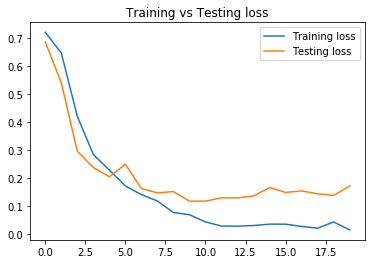

In [33]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.title('Training vs Testing loss')
plt.legend()
plt.show()

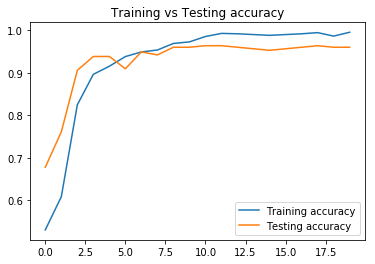

In [34]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.title('Training vs Testing accuracy')
plt.legend()
plt.show()

In [36]:
ypred1 = m1.predict(x_test)

In [37]:
ypred1 = [np.argmax(i) for i in ypred1]
print(ypred1)

[0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]


In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
y_test[:4]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [42]:
y_test1 = [np.argmax(i) for i in y_test]
y_test1[:4]

[0, 0, 0, 1]

In [44]:
cm1 = confusion_matrix(y_test1,ypred1)
print(cm1)
print(classification_report(y_test1,ypred1))

[[126   6]
 [  5 139]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       132
           1       0.96      0.97      0.96       144

    accuracy                           0.96       276
   macro avg       0.96      0.96      0.96       276
weighted avg       0.96      0.96      0.96       276



In [45]:
m1.save('facemask1.h5')

In [84]:
m1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       2000      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0         
_________________________________________________________________
dropout (Dropout)            (None, 52900)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                2

#### Part 3 (Testing on live images)

In [47]:
from tensorflow.keras.models import load_model

In [58]:
model = load_model('model-017.model')

In [62]:
face_cls = cv2.CascadeClassifier('D:\\Github Downloaded Repos\\haar-cascade-files-master\\haarcascade_frontalface_default.xml')

In [64]:
labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [65]:
source = cv2.VideoCapture(0)

while(True):
    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cls.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img = gray[y:y+w,x:x+w]
        resized = cv2.resize(face_img,(100,100))
        normalized = resized/255.0
        reshaped = np.reshape(normalized,(1,100,100,1))
        result = model.predict(reshaped)

        label = np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

#### Part 5 (Test on a test image)

(428, 320, 3)


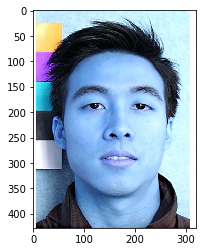

In [68]:
w1 = cv2.imread('15.jpg')
print(w1.shape)
plt.imshow(w1)

In [76]:
gray = cv2.cvtColor(w1,cv2.COLOR_BGR2GRAY)
faces = face_cls.detectMultiScale(gray,1.3,5)
for x,y,w,h in faces:
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)
print(result)
result = [np.argmax(i) for i in result]
print(result[0])
labels_dict={0:'MASK',1:'NO MASK'}
print(labels_dict[result[0]])

[[0.05202317 0.9479768 ]]
1
NO MASK


(428, 320, 3)


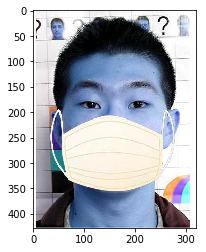

In [77]:
w2 = cv2.imread('40.jpg')
print(w2.shape)
plt.imshow(w2)

In [78]:
gray = cv2.cvtColor(w2,cv2.COLOR_BGR2GRAY)
faces = face_cls.detectMultiScale(gray,1.3,5)
for x,y,w,h in faces:
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)
print(result)
result = [np.argmax(i) for i in result]
print(result[0])
labels_dict={0:'MASK',1:'NO MASK'}
print(labels_dict[result[0]])

[1]
0
MASK


In [79]:
gray = cv2.cvtColor(w2,cv2.COLOR_BGR2GRAY)
# faces = face_cls.detectMultiScale(gray,1.3,5)
# face_img=gray[y:y+w,x:x+w]
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model.predict(reshaped)
print(result)
result = [np.argmax(i) for i in result]
print(result[0])
labels_dict={0:'MASK',1:'NO MASK'}
print(labels_dict[result[0]])

[[9.9999928e-01 7.0327127e-07]]
0
MASK


In [80]:
gray = cv2.cvtColor(w1,cv2.COLOR_BGR2GRAY)
# faces = face_cls.detectMultiScale(gray,1.3,5)
# face_img=gray[y:y+w,x:x+w]
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model.predict(reshaped)
print(result)
result = [np.argmax(i) for i in result]
print(result[0])
labels_dict={0:'MASK',1:'NO MASK'}
print(labels_dict[result[0]])

[[3.3602278e-06 9.9999666e-01]]
1
NO MASK


In [81]:
model1 = load_model('facemask1.h5')

In [82]:
gray = cv2.cvtColor(w1,cv2.COLOR_BGR2GRAY)
# faces = face_cls.detectMultiScale(gray,1.3,5)
# face_img=gray[y:y+w,x:x+w]
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model1.predict(reshaped)
print(result)
result = [np.argmax(i) for i in result]
print(result[0])
labels_dict={0:'MASK',1:'NO MASK'}
print(labels_dict[result[0]])

[[1.10075156e-07 9.99999881e-01]]
1
NO MASK


In [83]:
gray = cv2.cvtColor(w2,cv2.COLOR_BGR2GRAY)
# faces = face_cls.detectMultiScale(gray,1.3,5)
# face_img=gray[y:y+w,x:x+w]
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model1.predict(reshaped)
print(result)
result = [np.argmax(i) for i in result]
print(result[0])
labels_dict={0:'MASK',1:'NO MASK'}
print(labels_dict[result[0]])

[[1.000000e+00 3.790183e-08]]
0
MASK
